## Oficina 2: Sistema de classificação de imagens

Você foi contratado para criar um sistema que realiza a classificação de imagens de frutas para uma empresa de e-commerce. O objetivo é que, ao enviar uma imagem, o sistema identifique se a fruta é uma maçã, uma banana ou uma laranja. Sabendo que você possui um banco de imagens já categorizado, explique quais tipos de redes neurais você utilizaria para resolver esse problema, como seria o processo de implementação utilizando Python e quais etapas principais precisam ser seguidas para treinar o modelo.
Padrão de Resposta para a Atividade:

- Indicação clara do tipo de rede neural usada e justificativa do porquê de ser a escolha mais adequada;
- Descrição do processo de pré-processamento das imagens;
- Apresentação do modelo de rede neural em Python, com uma breve explicação de cada camada;
- Compilação e treinamento do modelo, mencionando a função de perda e o otimizador usados;
- Processo de avaliação e validação do modelo;
- Conclusão explicando como o modelo resolverá o problema proposto.

In [10]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import zipfile as zf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
import zipfile


In [11]:

zip_file_path = '/workspaces/Uece-C-Jovem/Ciência de Dados - Avançado/360fruits (2).zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

print("Unzipping completed.")

Unzipping completed.


In [12]:
test_path = ("360fruits/treinamento")
train_path = ("360fruits/teste")

In [13]:
img_widht = 100
img_height = 100



In [14]:

data_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="int",
    image_size=(img_widht, img_height),
    color_mode="rgb",
    batch_size=32,
)

data_test = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="int",
    image_size=(img_widht, img_height),
    color_mode="rgb",
    batch_size=32,
)




Found 10190 files belonging to 20 classes.
Found 3403 files belonging to 20 classes.


2025-02-19 15:07:51.815852: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


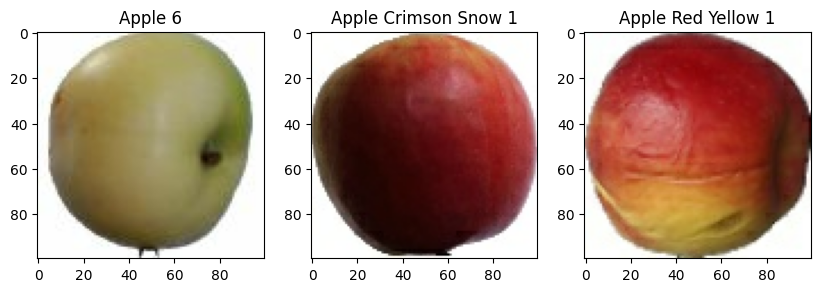

In [15]:

plt.figure(figsize=(10, 10))

for images, labels in data_train.take(1):
    for i in range(3):
       plt.subplot(3,3, i + 1)
       plt.imshow(images[i].numpy().astype("uint8"))
       plt.title(data_train.class_names[labels[i]])

    


In [16]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(40, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history = model.fit(
    data_train,  # Imagens de treinamento e rótulos de treinamento incluídos no tf.data.Dataset
    epochs=10,    # Número de épocas
    batch_size=64,  # Tamanho do lote
    validation_data=data_test
)

Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 48s 147ms/step - accuracy: 0.7268 - loss: 56.6195 - val_accuracy: 0.8252 - val_loss: 0.9979
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.9797 - loss: 0.0879 - val_accuracy: 0.8654 - val_loss: 0.8336
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.8557 - val_loss: 0.7710
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 45s 140ms/step - accuracy: 0.9675 - loss: 0.1742 - val_accuracy: 0.8678 - val_loss: 1.0579
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.9974 - loss: 0.0105 - val_accuracy: 0.9151 - val_loss: 0.8316
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 47s 147ms/step - accuracy: 1.0000 - loss: 4.5526e-04 - val_accuracy: 0.9257 - val_loss: 0.7666
Epoch 7/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 80s 139ms/step - accuracy: 1.0000 - loss: 1.3131e-05 - val_accuracy: 0.9254 - val_loss: 0.7780
Epoch 8/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 1.0000 

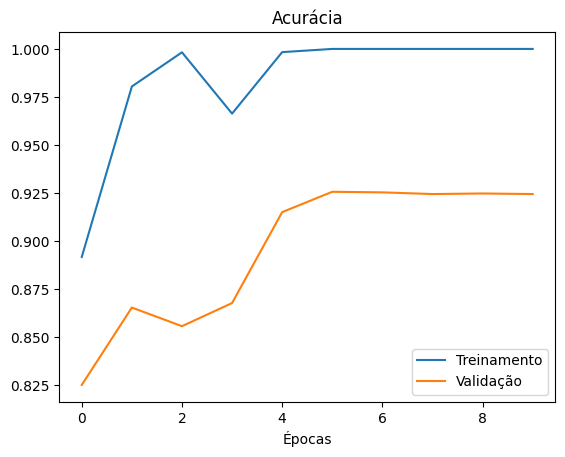

In [18]:
import matplotlib.pyplot as plt

# Plotar acurácia
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.legend()
plt.show()

In [ ]:
model.predict(data_test)
predictions = model.predict(data_test)
print(predictions)